In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file = 'lic-data-2016.csv'
nrows =-1 # to avoid loading full file each time
if nrows != -1 :
    data = pd.read_csv(file, sep=';', nrows=nrows, encoding='latin_1', dtype={'code_commune': str})
else:
     data= pd.read_csv(file, sep=';', encoding='latin_1', dtype={'code_commune': str})


In [3]:
# there is a need to add leading zero for couple of cities, in order to be able to merge wiht the geodata later on
data['code_commune'] = data['code_commune'].apply('{:0>5}'.format)

In [4]:
# Paragliding is about "vol libre" federation which is coded 258 in colmun 'fed_2016',
# accoridng to file federation-2016.xlsx
# let's keep only that federation
data = data[data['fed_2016'].isin(['258'])]

In [5]:
data.shape

(7829, 68)

In [6]:
# load jsonfile to draw with geopandas
jsonfile = 'communes-20190101.json'
map_df = gpd.read_file(jsonfile)

In [7]:
map_df.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry'], dtype='object')

In [8]:
# need to rename the code_commune in order to merge both dataset on the common column
col_names = data.columns.values
col_names[0] = 'insee'
data.columns = col_names

In [9]:
# merging both dataset
merged = map_df.merge(data, on='insee')

In [10]:
# removing the non metropolitan cities
merged = merged[~merged.insee.str.contains('97[0-9]{3}')]#.value_counts()

In [11]:
# need to add some Reg and Dep info with a 3rd dataset
regdep=pd.read_csv('data.csv', sep=';', dtype={'CODGEO': object})

/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
regdep=regdep[['CODGEO','REG','DEP']]

In [13]:
# need to rename the CODGEO in order to merge dataset
col_names = regdep.columns.values
col_names[0] = 'insee'
regdep.columns = col_names

In [14]:
all_data = merged.merge(regdep, on='insee')

In [51]:
by_region = all_data.groupby(by='REG')

In [54]:
by_region['l_2016'].value_counts()

REG  l_2016
11   1         186
     2         100
     3          73
     4          38
     5          28
     6          22
     8          14
     7          12
     13          7
     9           6
     10          6
     11          4
     14          4
     19          4
     21          4
     12          3
     15          3
     16          2
     20          2
     22          2
     27          2
     33          2
     17          1
     18          1
     23          1
     29          1
     30          1
     31          1
     32          1
     35          1
              ... 
93   33          2
     19          1
     21          1
     22          1
     23          1
     24          1
     25          1
     29          1
     30          1
     31          1
     34          1
     38          1
     40          1
     41          1
     48          1
     49          1
     78          1
     97          1
     99          1
     132         1
     151         1


In [63]:
temp = all_data[['l_2016','REG']]
temp = temp[temp['REG'].isin(['94'])]
temp['l_2016'].sum()

148

In [55]:
24+7+4+9*2+6*2+3*4+2*17+37


148

In [48]:
by_region['l_2016'].describe()

,count,mean,std,min,25%,50%,75%,max
REG,,,,,,,,
11,535.0,4.424299,6.340330,1.0,1.0,2.0,5.0,59.0
24,209.0,1.617225,2.008848,1.0,1.0,1.0,1.0,18.0
27,526.0,1.863118,4.065217,1.0,1.0,1.0,2.0,76.0
28,431.0,2.143852,4.863983,1.0,1.0,1.0,2.0,71.0
32,455.0,2.463736,6.633773,1.0,1.0,1.0,2.0,83.0
44,809.0,2.259580,4.894112,1.0,1.0,1.0,2.0,113.0
52,232.0,3.314655,9.046783,1.0,1.0,1.0,3.0,127.0
53,354.0,3.367232,7.568434,1.0,1.0,1.0,3.0,85.0
75,757.0,3.103038,8.363277,1.0,1.0,1.0,2.0,126.0


In [64]:
by_region = all_data[['l_2016','REG']].groupby(by='REG').sum()
by_region['l_2016'].value_counts()

2367    1
7933    1
924     1
980     1
3859    1
338     1
3684    1
2349    1
769     1
1192    1
148     1
1828    1
1121    1
Name: l_2016, dtype: int64

In [65]:
by_department = all_data[['l_2016','DEP']].groupby(by='DEP').sum()

In [66]:
by_department['l_2016'].value_counts()

52      4
381     2
312     2
32      2
307     2
125     2
28      1
43      1
35      1
420     1
550     1
39      1
313     1
41      1
45      1
385     1
207     1
189     1
50      1
180     1
53      1
196     1
55      1
159     1
414     1
314     1
270     1
167     1
258     1
951     1
       ..
111     1
240     1
115     1
116     1
118     1
759     1
376     1
124     1
350     1
92      1
90      1
1241    1
163     1
62      1
63      1
308     1
68      1
970     1
70      1
458     1
75      1
204     1
78      1
79      1
27      1
2130    1
1952    1
239     1
248     1
384     1
Name: l_2016, Length: 89, dtype: int64

In [15]:
# now, this is time to explore the data and extract some insights
# let's start with basic number of licensee and split by gender

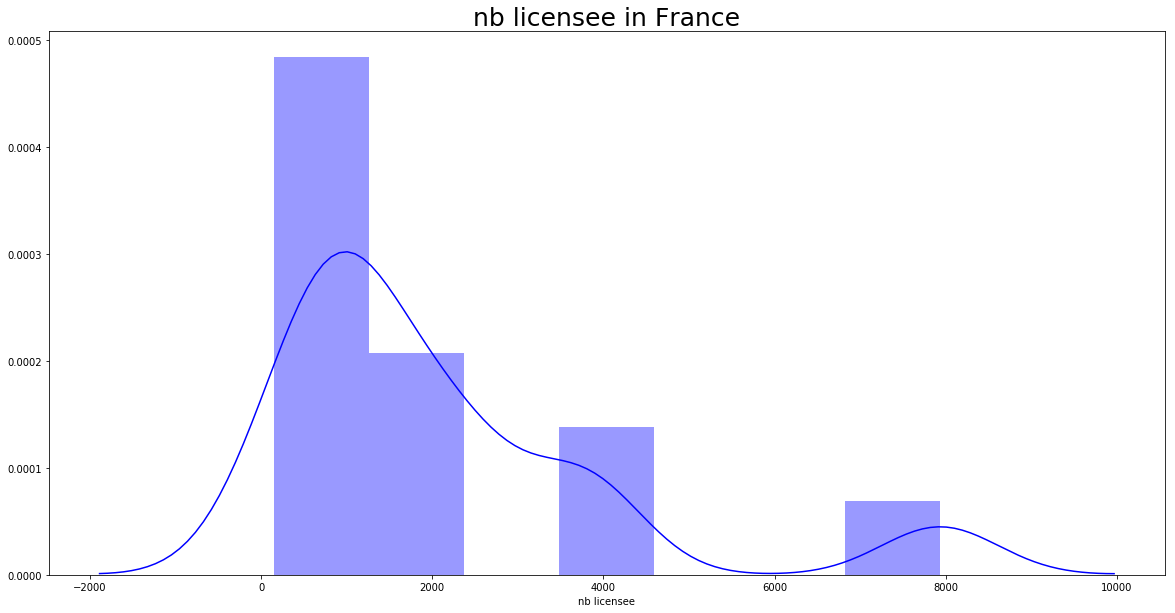

In [68]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
sns.distplot(by_region['l_2016'],ax=ax1,hist=True,color='b',axlabel='nb licensee').set_title('nb licensee in France',fontsize=25);

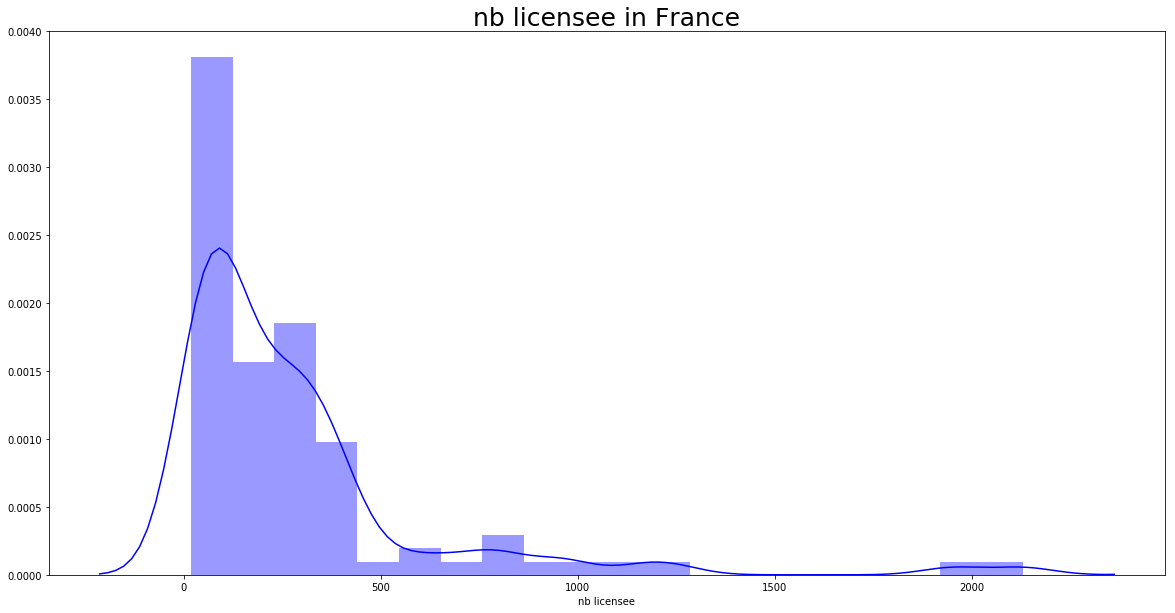

In [67]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
sns.distplot(by_department['l_2016'],ax=ax1,hist=True,color='b',axlabel='nb licensee').set_title('nb licensee in France',fontsize=25);

In [89]:
all_data[all_data['nom']=='Haguenau']

,insee,nom,wikipedia,surf_ha,geometry,libelle,region,fed_2016,nom_fed,l_2016,...,poph_5_9_2015,poph_10_14_2015,poph_15_19_2015,poph_20_29_2015,poph_30_44_2015,poph_45_59_2015,poph_60_74_2015,poph_75_2015,REG,DEP
7335,67180,Haguenau,fr:Haguenau,18354,"POLYGON ((7.640494199999997 48.86143209972667,...",Haguenau,Grand Est,258,Fédération française de vol libre,3,...,1013,977,1162,2705,3375,3620,2337,1002,44,67


In [ ]:
# by age ?

In [88]:
# top 10 cities in terms of number of licensee
top_10 = all_data.sort_values(by='l_2016', ascending=False)
top_10 = top_10[:10]

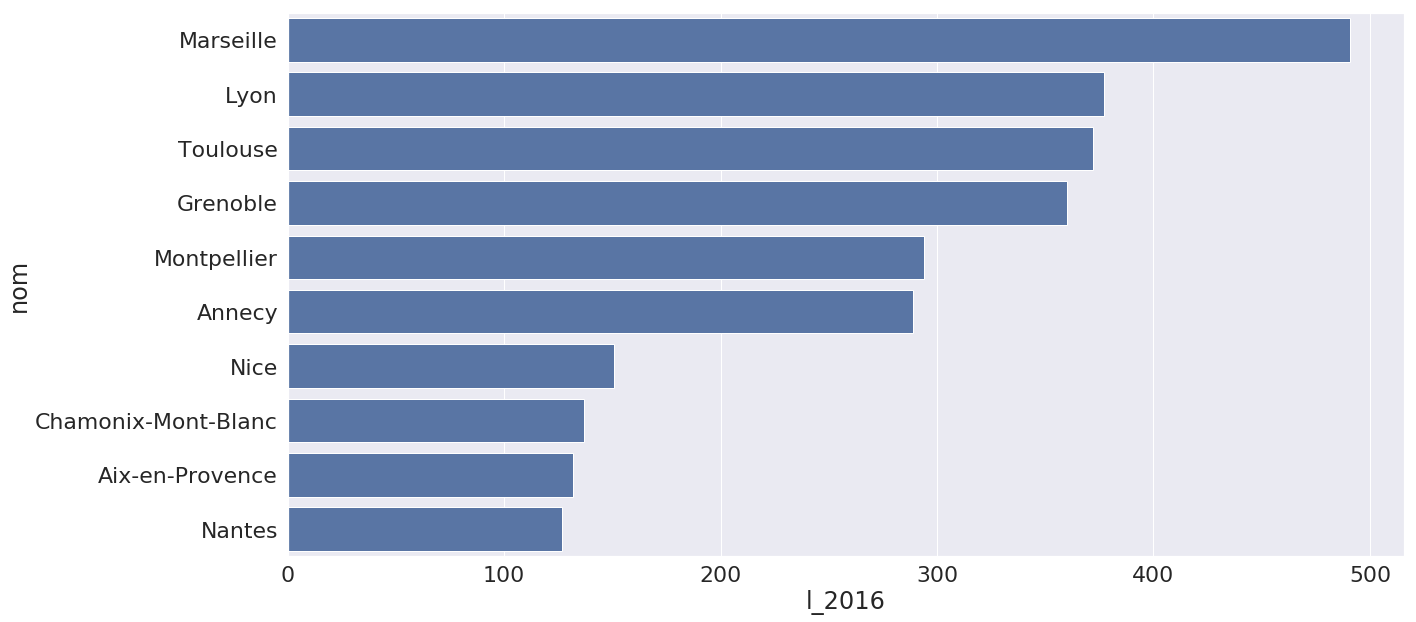

In [87]:
fig=plt.figure(figsize=(20,10))
sns.set(font_scale=2)
snsbp = sns.barplot(data=top_10,y='nom',x='l_2016',color='b',capsize=0.5);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90,minor=True);

In [81]:
# create a function to plot on the map
def plot_column(mydata, columnname, maptitle, color=plt.cm.Blues):
    vmin, vmax = int(np.min(mydata[columnname])), int(np.max(mydata[columnname]))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    mydata.plot(column=columnname, cmap=color, ax=ax, scheme='Quantiles', legend=True, k=50) #plt.cm.plasma 'OrRd'
    ax.set_title(maptitle, fontsize=5)

/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 11
  Warn('Warning: setting k to %d' % k_q, UserWarning)


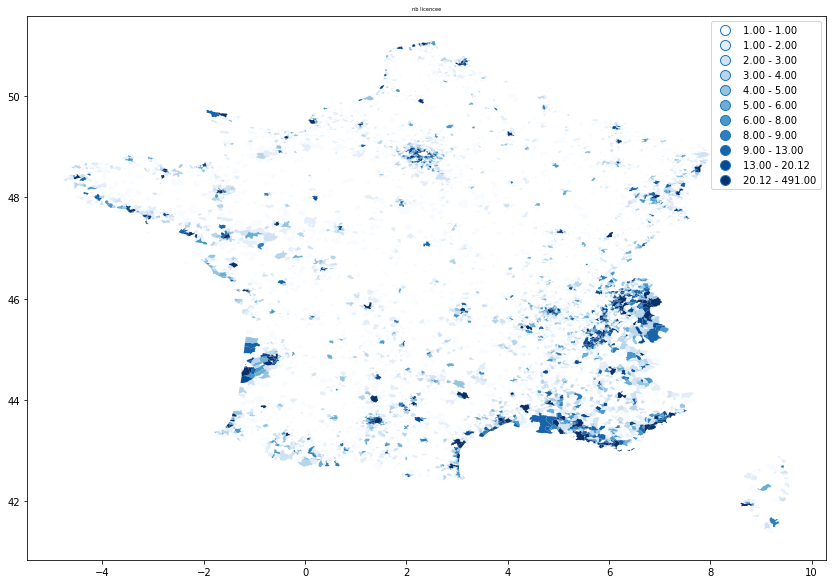

In [82]:
plot_column(all_data, 'l_2016','nb licencee')